# CA3

### Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Reading data

In [2]:
df = pd.read_csv('Assets/train.csv')
df

,Unnamed: 0,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
0,0,28.7,98741.0,0.0,222.897985,70.28,103.145212,35.481123,0.002636,61.877407,2.700236,71.355713,2.5,8.14,13792.0,87411.1826,5.090000,1.0
1,1,19.4,96077.0,0.0,205.832386,66.48,102.005624,32.609013,0.015950,297.191998,9.618586,46.291493,2.0,7.63,12985.0,72608.1826,4.990000,1.0
2,2,22.1,109154.0,2.0,234.406576,69.92,37.847317,37.926057,0.000279,61.103057,7.970050,54.442385,1.5,8.03,10008.0,109375.1826,5.219156,0.0
3,3,28.0,105277.0,5.0,214.999623,64.05,100.118399,34.610539,0.002323,58.677047,68.116450,106.401880,4.5,7.43,11303.0,84958.7826,3.228828,0.0
4,4,22.6,103898.0,2.0,180.542626,53.63,63.590438,28.948902,0.008611,317.261190,7.953544,48.057754,5.0,6.71,11475.0,49717.1826,4.800000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,1243,16.8,99423.0,0.0,212.988102,61.08,40.910882,33.728356,0.003155,195.342578,25.475841,7.033815,3.5,6.67,12224.0,77045.1826,5.000000,1.0
1244,1244,32.8,97732.0,1.0,216.074798,76.20,19.335461,34.925058,0.001954,167.035722,92.206845,51.766716,4.0,6.50,9626.0,87212.3826,5.332933,0.0
1245,1245,13.6,93981.0,0.0,181.435023,69.64,48.416290,29.071256,0.000355,118.170049,7.579661,7.756912,2.0,6.99,10423.0,51560.1826,4.880000,1.0
1246,1246,26.7,98269.0,1.0,228.399719,76.16,46.333693,37.776037,0.002577,217.742170,14.873524,66.630218,2.0,6.95,6753.0,105907.1826,3.383773,0.0


### Data exploration and visualisation

In [3]:
# Checking how many nan values that exists in each column
df[df.isnull().any(axis=1)]

,Unnamed: 0,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
9,9,18.6,98441.0,NaN,193.742185,56.51,45.007483,30.460301,0.007231,260.540489,6.283100,9.934014,4.5,6.88,11982.0,49288.1826,4.880000,1.0
25,25,25.3,102300.0,4.0,190.527909,60.61,24.900029,30.716374,NaN,100.715689,10.094517,96.583640,4.0,7.55,12719.0,54448.7826,3.400888,0.0
135,135,24.4,98459.0,0.0,217.066116,56.70,24.815873,34.428125,0.000225,160.302385,NaN,110.052118,5.5,7.07,9821.0,79927.1826,4.940000,0.0
161,161,21.8,97338.0,2.0,196.793798,64.13,NaN,30.856497,0.010620,72.248874,4.148618,51.922424,4.0,6.78,16100.0,58319.1826,4.790000,1.0
190,190,21.0,109623.0,0.0,217.672365,58.28,69.797327,34.187210,0.004681,51.740222,8.679276,94.442947,NaN,7.43,16826.0,86009.1826,5.040000,1.0
203,203,31.4,110062.0,6.0,247.568906,70.78,40.967272,38.856970,0.002345,333.611746,22.240862,6.767937,7.5,7.74,8096.0,NaN,3.849393,0.0
237,237,16.6,106015.0,4.0,223.744843,62.78,26.472882,NaN,0.010376,263.399529,43.789815,6.082008,2.0,7.87,14125.0,84148.7826,3.392290,0.0
280,280,27.3,101351.0,2.0,245.449299,62.16,79.354862,38.491853,0.000640,117.491764,11.453696,0.000000,4.0,7.73,8754.0,NaN,4.090321,0.0
330,330,6.2,100398.0,0.0,218.614502,62.09,4.736373,34.457676,0.004980,81.390160,26.009272,92.676919,3.5,7.04,NaN,84379.1826,4.970000,1.0
354,354,18.0,95815.0,0.0,210.940636,62.55,51.437889,32.705569,0.006073,212.767272,8.246290,29.564740,2.0,NaN,11727.0,71459.1826,4.960000,1.0


In [4]:
df.isnull().sum()

Unnamed: 0                              0
Acoustic Firmness Index                 3
Atmospheric Pressure at Harvest (Pa)    0
Bitterness Scale                        4
Circumference (mm)                      2
Color Intensity (a.u.)                  0
Find Distance from Main Vulcano (km)    2
Length (mm)                             4
Luminescence Intensity (a.u.)           1
Magnetic orientation (degree)           3
Odor index (a.u.)                       2
Seed Count                              1
Skin Thickness (mm)                     1
Soil pH where Grown                     3
Sugar Content (mg)                      3
Weight (mg)                             4
pH                                      4
Edible                                  0
dtype: int64

In [5]:
# Checking what the shape and what are the datatypes we are working
print("The shape of the data: ", df.shape)
print()
print("The datatypes in each column are: ", df.dtypes)

The shape of the data:  (1248, 18)

The datatypes in each column are:  Unnamed: 0                                int64
Acoustic Firmness Index                 float64
Atmospheric Pressure at Harvest (Pa)    float64
Bitterness Scale                        float64
Circumference (mm)                      float64
Color Intensity (a.u.)                  float64
Find Distance from Main Vulcano (km)    float64
Length (mm)                             float64
Luminescence Intensity (a.u.)           float64
Magnetic orientation (degree)           float64
Odor index (a.u.)                       float64
Seed Count                              float64
Skin Thickness (mm)                     float64
Soil pH where Grown                     float64
Sugar Content (mg)                      float64
Weight (mg)                             float64
pH                                      float64
Edible                                  float64
dtype: object


In [6]:
df.describe()

,Unnamed: 0,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
count,1248.000000,1245.000000,1248.000000,1244.000000,1246.000000,1248.000000,1246.000000,1244.000000,1247.000000,1245.000000,1246.000000,1247.000000,1247.000000,1245.000000,1245.000000,1244.000000,1244.000000,1248.000000
mean,623.500000,21.570077,101327.543269,1.808682,211.046062,63.300962,44.188204,33.589646,0.002850,178.933737,16.602442,48.926812,3.839615,7.278739,11835.978313,78446.779224,4.614780,0.494391
std,360.410877,8.131888,4772.582203,1.960279,24.652278,7.118135,28.331532,3.874355,0.003607,102.113321,14.882420,35.871733,1.483029,0.529815,2417.733775,26637.766132,0.993407,0.500169
min,0.000000,0.600000,83825.000000,0.000000,145.867667,46.060000,2.550790,23.451799,0.000004,0.085357,1.722825,0.000000,1.000000,5.710000,4566.000000,32352.182600,-5.120000,0.000000
25%,311.750000,17.300000,98095.750000,0.000000,192.982222,58.577500,21.203453,30.777936,0.000627,90.582930,7.615908,15.852008,3.000000,6.910000,10353.000000,57087.682600,4.174979,0.000000
50%,623.500000,21.300000,101357.000000,1.000000,212.429730,62.390000,38.880858,33.784401,0.001757,180.043851,12.258785,47.932723,4.000000,7.280000,11807.000000,77440.682600,4.910000,0.000000
75%,935.250000,25.300000,104470.750000,3.000000,226.313333,67.202500,60.680816,36.049083,0.003767,266.481765,20.302048,80.413165,5.000000,7.660000,13534.000000,92664.102600,5.080000,1.000000
max,1247.000000,156.520701,115636.000000,7.000000,274.719407,97.810000,109.952511,43.691515,0.044624,359.443812,152.041780,112.968004,8.500000,8.980000,18246.000000,164679.342600,6.081918,1.000000


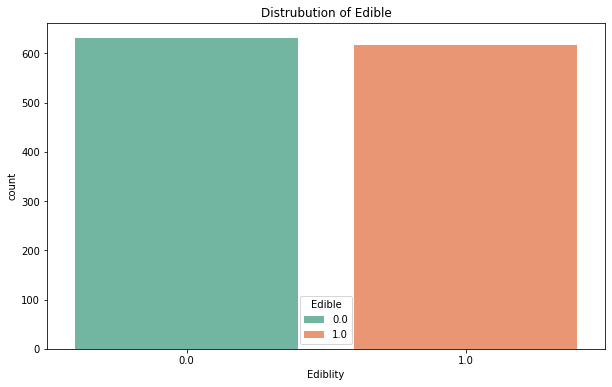

In [7]:
# Cheking edible vs non edible
plt.figure(figsize=(10, 6))
sns.countplot(x='Edible', data=df, palette="Set2", hue='Edible')
plt.title('Distrubution of Edible')
plt.xlabel('Ediblity')
plt.ylabel('count')
plt.show()

In [8]:
# Creates plots of distribution
def plot_dist(df, column_names):
    plt.figure(figsize=(32,24))
    
    for i in range(1, len(column_names)-1):
        plt.subplot(4, 4, i)
        sns.histplot(df[column_names[i]], bins=20, kde=True)
        plt.title('Distrubution of {0}'.format(column_names[i]))
        
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)
    plt.show()

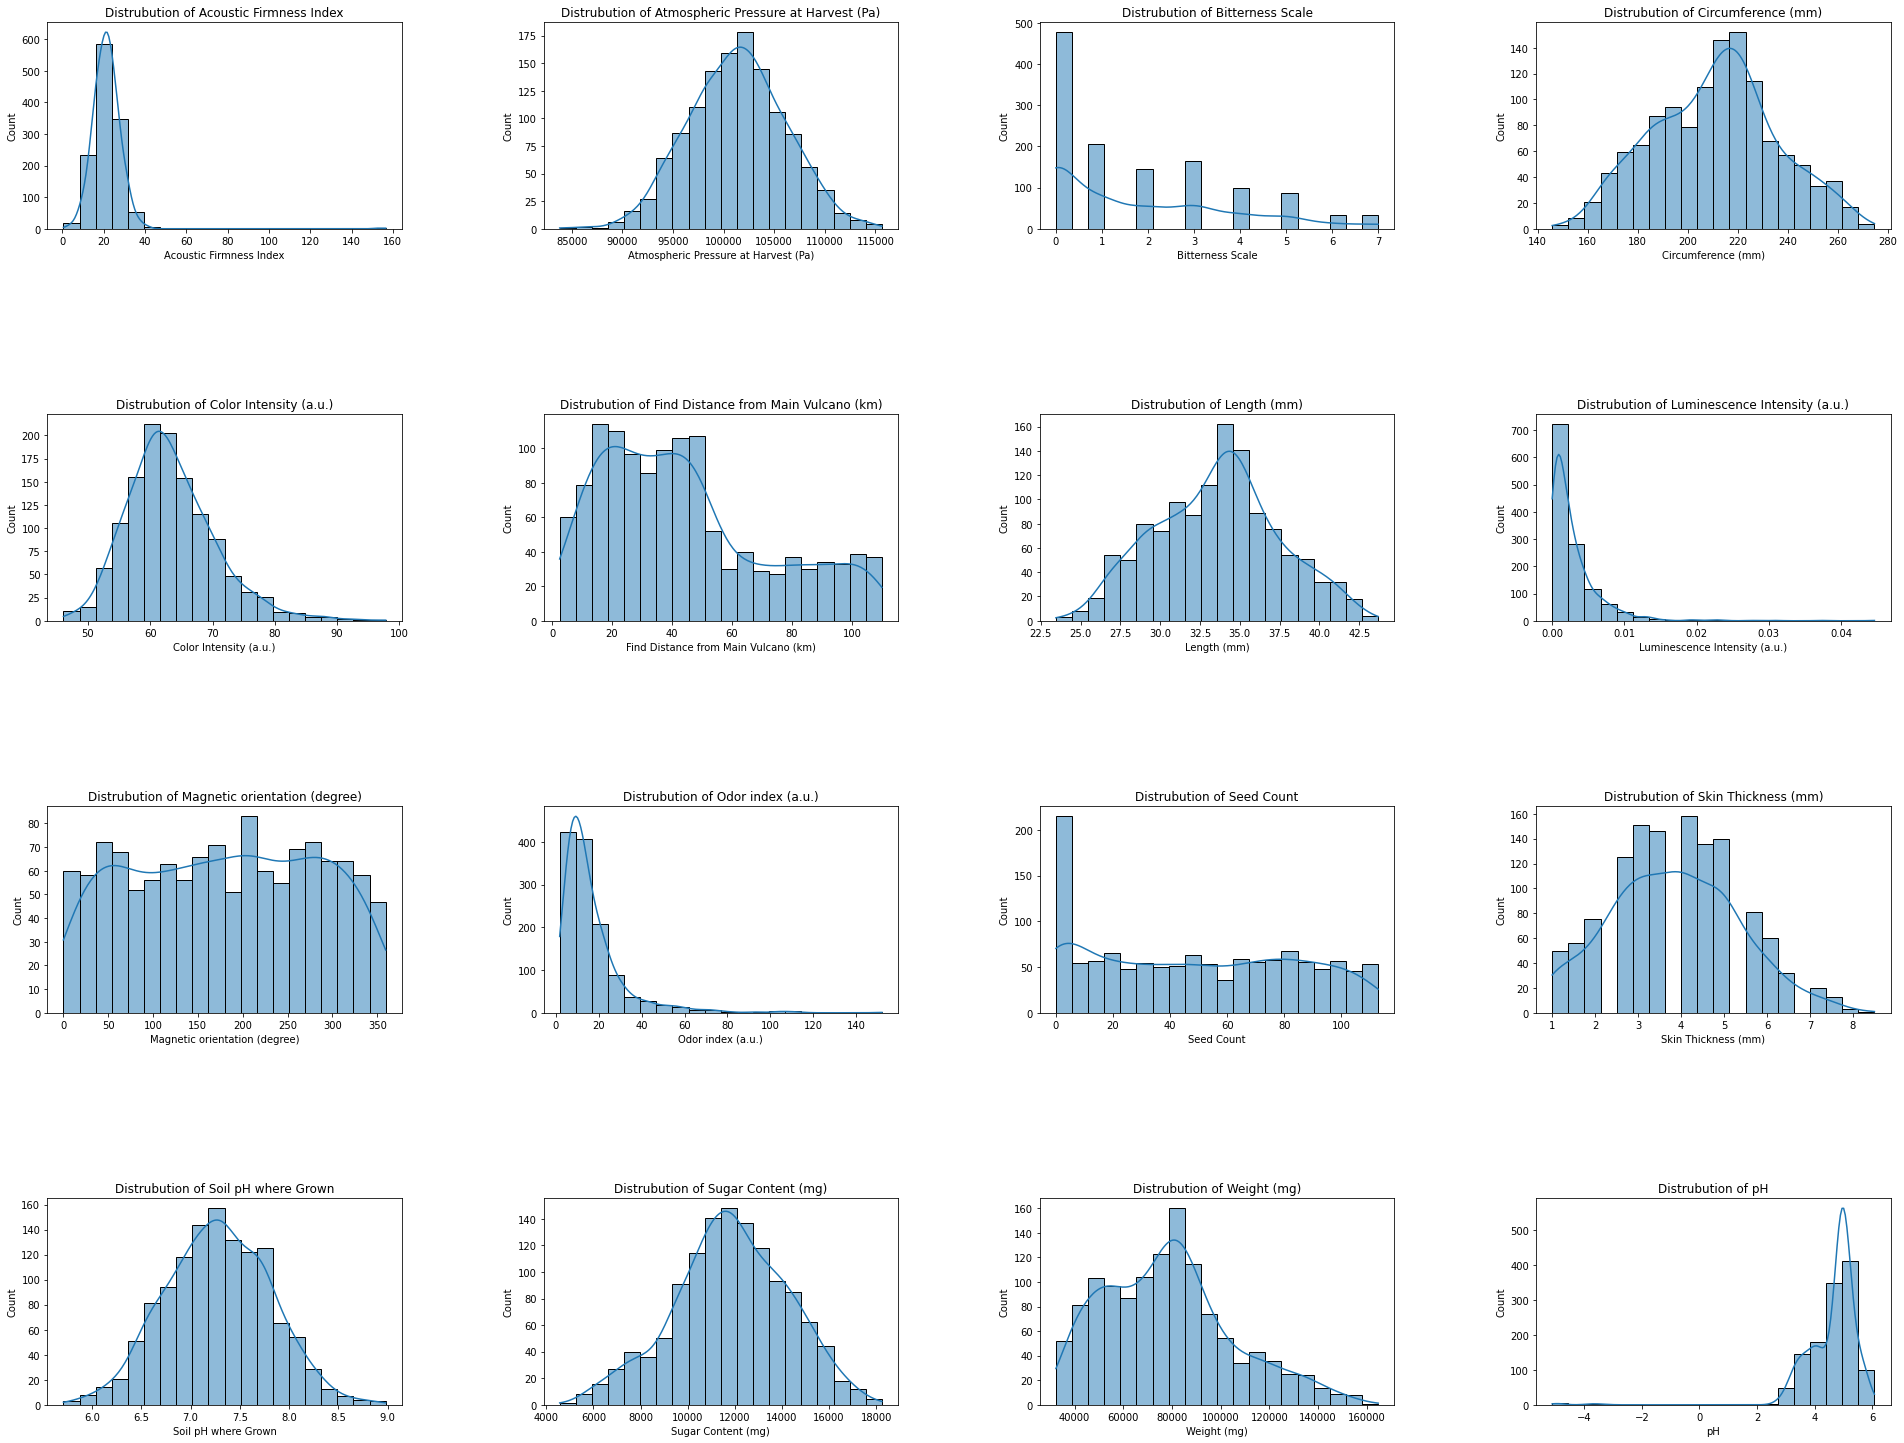

In [9]:
# I want to see the distribution for all of the columns in our dataset
column_names = df.columns
plot_dist(df, column_names)

### Data cleaning

Since there is some missing data, I will write some code in order to remove those follwing rows with the missing information.

In [10]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0                              0
Acoustic Firmness Index                 0
Atmospheric Pressure at Harvest (Pa)    0
Bitterness Scale                        0
Circumference (mm)                      0
Color Intensity (a.u.)                  0
Find Distance from Main Vulcano (km)    0
Length (mm)                             0
Luminescence Intensity (a.u.)           0
Magnetic orientation (degree)           0
Odor index (a.u.)                       0
Seed Count                              0
Skin Thickness (mm)                     0
Soil pH where Grown                     0
Sugar Content (mg)                      0
Weight (mg)                             0
pH                                      0
Edible                                  0
dtype: int64

### Data preprocessing and visualisation

In [11]:
# Separating our feautures from the targets 
X = df.drop(columns=['Edible'])
y = df['Edible']

y = y.to_numpy().ravel()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# I am only creating this dataframe in order to visualise the data after scaling
df_X = pd.DataFrame(X_scaled)

df_X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03,1.211000e+03
mean,-9.387848e-17,5.020298e-16,-1.240956e-15,-5.427350e-17,-7.422267e-16,-1.280561e-15,2.236948e-16,4.488565e-16,-1.261492e-16,8.067682e-18,-2.024255e-16,-7.187571e-17,-2.933702e-17,1.813028e-15,-1.525525e-16,1.056133e-16,-5.163316e-16
std,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00
min,-1.729171e+00,-2.570535e+00,-3.653766e+00,-9.186085e-01,-2.641420e+00,-2.429791e+00,-1.465282e+00,-2.561326e+00,-7.912093e-01,-1.751866e+00,-9.997055e-01,-1.366832e+00,-1.921457e+00,-2.957833e+00,-2.999671e+00,-1.728076e+00,-9.717837e+00
25%,-8.669174e-01,-5.284072e-01,-6.819818e-01,-9.186085e-01,-7.324914e-01,-6.624328e-01,-8.127421e-01,-7.270192e-01,-6.161209e-01,-8.664732e-01,-6.025744e-01,-9.187976e-01,-5.686172e-01,-6.906535e-01,-6.106182e-01,-8.020920e-01,-4.390906e-01
50%,3.666718e-03,-2.704633e-02,5.483852e-03,-4.101830e-01,4.552176e-02,-1.250938e-01,-2.004958e-01,4.280782e-02,-2.982435e-01,1.387026e-02,-2.901304e-01,-2.679206e-02,1.078027e-01,8.393494e-03,-1.542013e-02,-3.934555e-02,2.944678e-01
75%,8.631429e-01,4.620862e-01,6.624836e-01,6.066678e-01,6.262678e-01,5.562887e-01,5.759479e-01,6.359961e-01,2.492339e-01,8.562021e-01,2.512178e-01,8.680350e-01,7.842225e-01,7.168871e-01,7.164959e-01,5.445300e-01,4.641678e-01
max,1.733727e+00,1.649594e+01,2.984258e+00,2.640370e+00,2.585105e+00,4.878301e+00,2.324632e+00,2.610078e+00,1.180365e+01,1.760999e+00,9.090555e+00,1.791378e+00,3.151692e+00,3.220231e+00,2.650786e+00,3.227348e+00,1.464318e+00


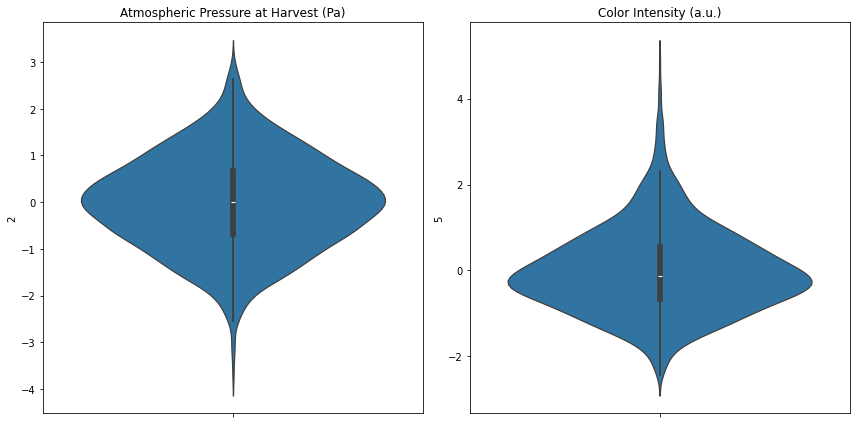

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=df_X, y=2, ax=axes[0])
axes[0].set_title('Atmospheric Pressure at Harvest (Pa)')

axes[1].set_title('Color Intensity (a.u.)')
sns.violinplot(data=df_X, y=5, ax=axes[1])

fig.tight_layout()
plt.show()

In [14]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 0.3

### Modelling

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=0)
X_train_sc = scaler.transform(X_train)

clf = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_split=16)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_pred, y_val)
print("Accuracy: ", accuracy)

Accuracy:  0.8938053097345132


In [16]:
clf.fit(X, y)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8681318681318682


### Final evaluation

In [17]:
X_test = pd.read_csv('Assets/test.csv')
clf.fit(X, y)
y_pred = clf.predict(X_test)

### Kaggle submission

In [18]:
y_csv = np.savetxt('y_pred.csv', np.dstack((np.arange(0, y_pred.size),y_pred))[0],"%d,%d", header="index,Edible", comments='')